In [1]:
import pandas as pd
import sweetviz as sv
import numpy as np
from sklearn.model_selection import train_test_split
# read_date

# increase column number display in pandas
pd.set_option('display.max_columns', 100)

def read_csv():
    # read csv and parse dates column to datetime
    df = pd.read_csv("loan.csv", parse_dates=['issue_d'])
    # delete columns which has more than 50% missing values
    df = df.dropna(thresh=len(df)/2, axis=1)
    # check columns which has same values of 90% data and delete it.
    for col in df.columns:
        if df[col].value_counts().iloc[0] > len(df)*0.9:
            df = df.drop(col, axis=1)
    return df

def make_train_test(df):
    # split data to train and test
    sorted_df = df[df['loan_status'] != 'Current'].reset_index(drop=True)
    sorted_df["loan_status"] = sorted_df["loan_status"].map({"Fully Paid": 0, "Charged Off": 1})
    X = sorted_df.drop('loan_status', axis=1)
    y = sorted_df['loan_status']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train.reset_index(drop=True,inplace=True)
    X_test.reset_index(drop=True,inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
    return X_train, X_test, y_train, y_test

df = read_csv()
X_train, X_test, y_train, y_test = make_train_test(df)

# # check data by sweetviz
# my_report = sv.analyze(df)
# my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

X_train.head()

/var/folders/bn/rl_jjr9954g90cslgcdghg7r0000gn/T/ipykernel_91619/1290540890.py:34: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  df = read_csv()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,766050,967018,11600,11600,11575.00000,36 months,13.49%,393.60,C,C2,senior helpers,2 years,RENT,65000.0,Not Verified,May-11,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 05/23/11 > pay off my debt...,debt_consolidation,out of debt,082xx,NJ,12.17,0,Oct-94,1,19,18534,61%,43,14169.301550,14138.76,11600.0,2569.30,0.0,Jun-14,431.09,Jun-14
1,352787,356100,3000,2000,0.00000,36 months,12.54%,66.95,C,C5,Calpers,< 1 year,MORTGAGE,31000.0,Not Verified,Aug-08,https://lendingclub.com/browse/loanDetail.acti...,I started my bathroom remodel last spring and ...,home_improvement,I want my bathroom back!,922xx,CA,3.02,0,May-88,3,8,3574,60.60%,15,2399.780000,0.00,2000.0,399.78,0.0,Mar-11,391.28,Sep-14
2,965950,1186801,5600,5600,5600.00000,36 months,6.62%,171.95,A,A2,"Envy Medical, Inc.",5 years,RENT,38000.0,Not Verified,Sep-11,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt Consolidation Loan,930xx,CA,4.39,0,Apr-02,0,15,4393,27.10%,23,6189.820811,6189.82,5600.0,589.82,0.0,Oct-14,179.25,May-16
3,656846,840065,7000,7000,7000.00000,36 months,9.63%,224.66,B,B1,Oasis Landscape Construction,6 years,MORTGAGE,66000.0,Verified,Jan-11,https://lendingclub.com/browse/loanDetail.acti...,NaN,car,2005 CK 2500,875xx,NM,22.84,0,Jan-70,3,15,15360,48.30%,22,8088.561276,8088.56,7000.0,1088.56,0.0,Feb-14,240.62,May-16
4,599732,769790,12000,12000,11797.44607,60 months,5.79%,230.83,A,A2,American Packaging Corporation,10+ years,MORTGAGE,74265.0,Verified,Oct-10,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 10/18/10 > I am purchasing...,major_purchase,Timeshare loan,145xx,NY,10.65,0,Mar-94,1,10,30013,10.10%,30,13279.044090,13054.37,12000.0,1279.04,0.0,Mar-13,6260.06,Mar-13


In [2]:
class base():
    def fit(base, input_df):
        return base.transform(input_df)
        
    def transform():
        raise NotImplementedError

In [3]:
class preprocess_features(base):
    def transform_term(self, input_df):
        output_df = pd.DataFrame()
        output_df['converted_term'] = input_df['term'].str.replace('months', '').astype(int)
        return output_df

    def transform_int_rate(self, input_df):
        output_df = pd.DataFrame()
        output_df['converted_int_rate'] = input_df['int_rate'].str.replace('%', '').astype(float)
        return output_df
    
    def transform_revol_util(self, input_df):
        output_df = pd.DataFrame()
        output_df['converted_revol_util'] = input_df['revol_util'].str.replace('%', '').astype(float)
        return output_df
    
    def transform(self, input_df):
        input_df["term"] = self.transform_term(input_df)
        input_df["int_rate"] = self.transform_int_rate(input_df)
        input_df["revol_util"] = self.transform_revol_util(input_df)
        return input_df

preprocess = preprocess_features()
X_train = preprocess.fit(X_train)
X_test = preprocess.transform(X_test)
X_train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,766050,967018,11600,11600,11575.00000,36,13.49,393.60,C,C2,senior helpers,2 years,RENT,65000.0,Not Verified,May-11,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 05/23/11 > pay off my debt...,debt_consolidation,out of debt,082xx,NJ,12.17,0,Oct-94,1,19,18534,61.0,43,14169.301550,14138.76,11600.0,2569.30,0.0,Jun-14,431.09,Jun-14
1,352787,356100,3000,2000,0.00000,36,12.54,66.95,C,C5,Calpers,< 1 year,MORTGAGE,31000.0,Not Verified,Aug-08,https://lendingclub.com/browse/loanDetail.acti...,I started my bathroom remodel last spring and ...,home_improvement,I want my bathroom back!,922xx,CA,3.02,0,May-88,3,8,3574,60.6,15,2399.780000,0.00,2000.0,399.78,0.0,Mar-11,391.28,Sep-14
2,965950,1186801,5600,5600,5600.00000,36,6.62,171.95,A,A2,"Envy Medical, Inc.",5 years,RENT,38000.0,Not Verified,Sep-11,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt Consolidation Loan,930xx,CA,4.39,0,Apr-02,0,15,4393,27.1,23,6189.820811,6189.82,5600.0,589.82,0.0,Oct-14,179.25,May-16
3,656846,840065,7000,7000,7000.00000,36,9.63,224.66,B,B1,Oasis Landscape Construction,6 years,MORTGAGE,66000.0,Verified,Jan-11,https://lendingclub.com/browse/loanDetail.acti...,NaN,car,2005 CK 2500,875xx,NM,22.84,0,Jan-70,3,15,15360,48.3,22,8088.561276,8088.56,7000.0,1088.56,0.0,Feb-14,240.62,May-16
4,599732,769790,12000,12000,11797.44607,60,5.79,230.83,A,A2,American Packaging Corporation,10+ years,MORTGAGE,74265.0,Verified,Oct-10,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 10/18/10 > I am purchasing...,major_purchase,Timeshare loan,145xx,NY,10.65,0,Mar-94,1,10,30013,10.1,30,13279.044090,13054.37,12000.0,1279.04,0.0,Mar-13,6260.06,Mar-13


In [4]:
import category_encoders as ce

class ordinal_encoding_based_on_frequency_encoding(base):
    def __init__(self,col):
        self.col = col
    
    def fit(self, input_df):
        output_df = pd.DataFrame()
        value_counted = input_df[self.col].value_counts().sort_values()
        mapping_dict= {value:i for i,value in enumerate(value_counted.index)}
        mapping = [{"col":self.col,"mapping":mapping_dict}]
        self.encoder_ = ce.OrdinalEncoder(mapping=mapping)
        output_df = self.encoder_.fit_transform(input_df[self.col])
        return output_df.add_prefix(f"ordinal_")
    
    def transform(self, input_df):
        output_df = pd.DataFrame()
        output_df = self.encoder_.transform(input_df[self.col])
        return output_df.add_prefix(f"ordinal_")

test = ordinal_encoding_based_on_frequency_encoding("grade")
test.fit(X_train)
test.transform(X_test)

,ordinal_grade
0,5
1,6
2,4
3,6
4,3
...,...
7711,6
7712,3
7713,6
7714,4


In [5]:
# stacked predictionによりテキストをメタ特徴量化する。
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import Binarizer
from scipy.sparse import hstack
from sklearn.linear_model import ElasticNet,LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

class text_out_of_fold_prediction(base):
  def __init__(self, col):
    self.nfolds = 5
    self.seed = 71
    self.col = col
    self.models = []
    self.regression = False
    self.scores = []
    

    
  def fit(self, input_df, y):
    x = input_df[self.col].fillna("nan")
    # self.vectorizer_ = TfidfVectorizer(max_features=100)
    self.vectorizer_ = CountVectorizer(max_features=100)
    x = self.vectorizer_.fit_transform(x)
    self.binerizer_ = Binarizer()
    x = self.binerizer_.fit_transform(x)
    
    if self.regression:
      fold = KFold(n_splits=self.nfolds, random_state=self.seed, shuffle=True)
    else:
      fold = StratifiedKFold(n_splits=self.nfolds, random_state=self.seed, shuffle=True)
    oof_train = np.zeros(len(input_df))
    # stacked prediction
    for i, (train_idx, valid_idx) in enumerate(fold.split(input_df[self.col], y)):
      train_x, train_y = x[train_idx], y.loc[train_idx]
      valid_x, valid_y = x[valid_idx], y.loc[valid_idx]
      
      if self.regression:
        clf = ElasticNet(random_state=self.seed)
        clf.fit(train_x, train_y)
        pred_y = clf.predict(valid_x)
        score = mean_squared_error(valid_y, pred_y)
      else:
        clf = LogisticRegression(penalty='elasticnet',solver='saga',random_state=self.seed, max_iter=10000, C=1.0, l1_ratio=0.5, class_weight='balanced')
        clf.fit(train_x, train_y)
        pred_y = clf.predict_proba(valid_x)[:,1]
        score = roc_auc_score(valid_y, pred_y)  
      print(f'CV Score of Fold_{i} is {score}')
      self.models.append(clf)
      self.scores.append(score)
      oof_train[valid_idx]= pred_y
      
    print(f"mean score is {np.mean(self.scores)}")
    output_df = pd.DataFrame()
    output_df[self.col] = oof_train
    return output_df.add_prefix("predicted_")
        
  def transform(self, input_df):
    x = input_df[self.col].fillna("nan")
    x = self.vectorizer_.transform(x)
    x = self.binerizer_.transform(x)
    oof_test = np.zeros(len(input_df))
    if self.regression:
      for clf in self.models:
        oof_test += clf.predict(x)
    else:
      for clf in self.models:
        oof_test += clf.predict_proba(x)[:,1]
    oof_test /= self.nfolds
    output_df = pd.DataFrame()
    output_df[self.col] = oof_test
    return output_df.add_prefix("predicted_")

test = text_out_of_fold_prediction("desc")
test.fit(X_train, y_train)
test.transform(X_test)

CV Score of Fold_0 is 0.5831213249310964
CV Score of Fold_1 is 0.5548895764461138
CV Score of Fold_2 is 0.5693482018666721
CV Score of Fold_3 is 0.578378660437707
CV Score of Fold_4 is 0.5761432778304136
mean score is 0.5723762083024007


,predicted_desc
0,0.495711
1,0.495711
2,0.495711
3,0.540274
4,0.495711
...,...
7711,0.495711
7712,0.460400
7713,0.598456
7714,0.656807


In [30]:
# テキストの重要堂やカウントを整理する
class text_check_insight():
    def __init__(self, col):
        self.col = col
        self.regression =False
        self.seed = 1
 
    def create_words_summary(self, clf, x):
        output_df = pd.DataFrame()
        output_df["features"] = self.vectorizer_.get_feature_names()
        output_df["wordcounts"] = (np.array(x.sum(axis=0)).flatten())
        output_df["coefs"] = clf.coef_.flatten()
        return output_df.sort_values(by="coefs").reset_index(drop=True)
    
    def __call__(self, input_df, y):
        x = input_df[self.col].fillna("nan")
        self.vectorizer_ = CountVectorizer(max_features=1000)
        x = self.vectorizer_.fit_transform(x)
        self.binerizer_ = Binarizer()
        x = self.binerizer_.fit_transform(x)
        
        if self.regression:
            clf = ElasticNet(random_state=self.seed)
        else:
            clf = LogisticRegression(penalty='elasticnet',solver='saga',random_state=self.seed, max_iter=10000, C=1.0, l1_ratio=0.5, class_weight='balanced')
        clf.fit(x, y)
        return self.create_words_summary(clf, x)

    
test = text_check_insight("desc")
df_word_summary = test(X_train, y_train)
df_word_summary

,features,wordcounts,coefs
0,rsquo,113,-1.046679
1,motorcycle,255,-0.974494
2,pool,173,-0.950907
3,ring,188,-0.941499
4,land,92,-0.887875
...,...,...,...
995,cars,141,0.715512
996,pretty,167,0.746597
997,dont,113,0.783714
998,law,162,0.811390


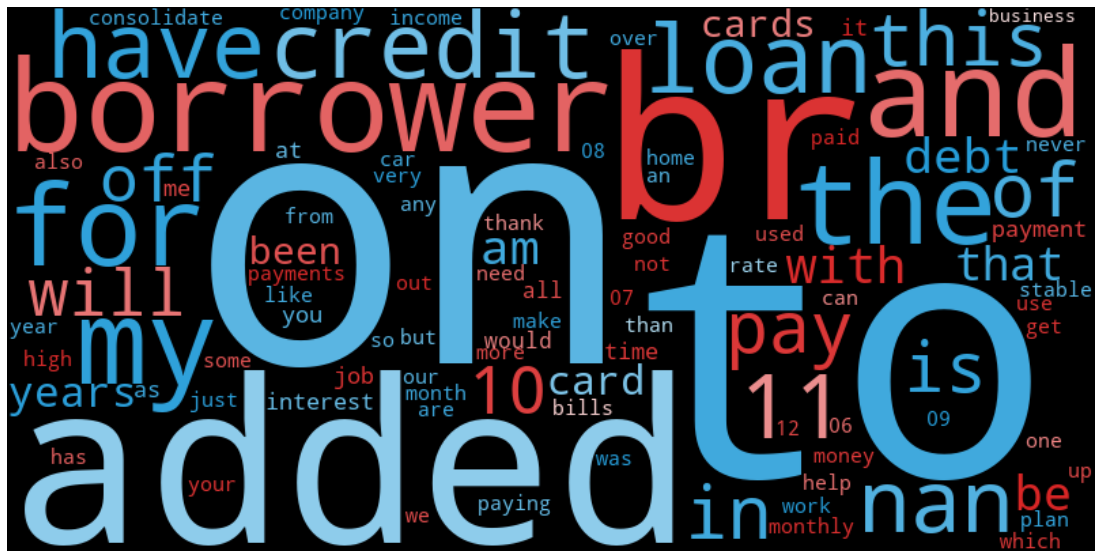

In [34]:
# ワードクラウドで可視化する。
# 閾値を設けてある一定の頻度のものだけ表示にしてもいいかも
# 今後Stopword除去も配慮する
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a dictionary where keys are words and values are corresponding wordcounts
wordcounts = dict(zip(df['features'], df['wordcounts']))

# Define a color function
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    coef = df[df['features'] == word]['coefs'].values[0]
    if coef > 0:
        return "hsl(0, 70%%, %d%%)" % (50 + coef * 100) # adjust these numbers to change color
    else:
        return "hsl(200, 70%%, %d%%)" % (50 - coef * 100) # adjust these numbers to change color

wordcloud = WordCloud(width=800, height=400, color_func=color_func,
                      prefer_horizontal=1.0).generate_from_frequencies(wordcounts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [39]:
# making all features

feature_blocks = [*[ordinal_encoding_based_on_frequency_encoding(col) for col in
                    ["grade", "sub_grade","emp_length","home_ownership","verification_status",
                     "purpose","zip_code","addr_state",]]]
stacked_predict_feature = [*[text_out_of_fold_prediction(col) for col in ["desc","title"]]]

def run_blocks(input_df, y_df, blocks, stacked_blocks, test=False):
    output_df = pd.DataFrame()
    use_original_columns = ["loan_amnt","funded_amnt","funded_amnt_inv","term",
                            "int_rate","installment","annual_inc"]
    output_df = input_df[use_original_columns]
    for block in blocks:
        if test:
            output_i = block.transform(input_df)
        else:
            output_i = block.fit(input_df)
        assert len(input_df) == len(output_i), block
        output_df = pd.concat([output_df,output_i],axis=1)
    
    for block in stacked_blocks:
        if test:
            output_i = block.transform(input_df)
        else:
            output_i = block.fit(input_df,y_df)
        assert len(input_df) == len(output_i), block
        output_df = pd.concat([output_df,output_i],axis=1)
    return output_df


run_blocks(X_train, y_train, feature_blocks, stacked_predict_feature)


CV Score of Fold_0 is 0.5831213249310964
CV Score of Fold_1 is 0.5548895764461138
CV Score of Fold_2 is 0.5693482018666721
CV Score of Fold_3 is 0.578378660437707
CV Score of Fold_4 is 0.5761432778304136
mean score is 0.5723762083024007
CV Score of Fold_0 is 0.5646549697092864
CV Score of Fold_1 is 0.5524510041915489
CV Score of Fold_2 is 0.5487852226836267
CV Score of Fold_3 is 0.5503413076783519
CV Score of Fold_4 is 0.5569371090101531
mean score is 0.5546339226545933


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,ordinal_grade,ordinal_sub_grade,ordinal_emp_length,ordinal_home_ownership,ordinal_verification_status,ordinal_purpose,ordinal_zip_code,ordinal_addr_state,predicted_desc,predicted_title
0,11600,11600,11575.00000,36,13.49,393.60,65000.0,4,27,8.0,4,2,13,556,45,0.546066,0.529585
1,3000,2000,0.00000,36,12.54,66.95,31000.0,4,20,9.0,3,2,10,714,49,0.558316,0.521372
2,5600,5600,5600.00000,36,6.62,171.95,38000.0,5,24,5.0,4,2,13,713,49,0.497925,0.522298
3,7000,7000,7000.00000,36,9.63,224.66,66000.0,6,25,3.0,3,1,7,335,16,0.499421,0.507300
4,12000,12000,11797.44607,60,5.79,230.83,74265.0,5,24,10.0,3,1,9,558,48,0.415847,0.500079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30856,15775,15775,15700.00000,36,10.59,513.40,56472.0,6,28,6.0,4,2,13,780,49,0.385414,0.398826
30857,10000,10000,10000.00000,36,11.36,329.12,42000.0,6,31,6.0,4,2,0,790,48,0.492901,0.574995
30858,10000,6925,6925.00000,60,9.62,145.85,65000.0,6,33,10.0,3,0,7,738,29,0.468873,0.515703
30859,10150,10150,10150.00000,36,7.51,315.78,102000.0,5,26,8.0,4,2,12,791,46,0.453382,0.405996
